In [ ]:
import pandas as pd
import numpy as np

# Loading RAW dataset

mon = pd.read_csv("D:/Dissertation 2025/Data/Monday-WorkingHours.pcap_ISCX.csv")
fri1 = pd.read_csv("D:/Dissertation 2025/Data/Friday-WorkingHours-Morning.pcap_ISCX.csv")
fri2 = pd.read_csv("D:/Dissertation 2025/Data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
fri3 = pd.read_csv("D:/Dissertation 2025/Data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

print("Loaded files:")
print(mon.shape, fri1.shape, fri2.shape, fri3.shape)

# Merging 3 friday dataset into one
friday = pd.concat([fri1, fri2, fri3], ignore_index=True)
print("Merged Friday:", friday.shape)

# cleaning label column like space in or between
# Monday = 100% benign
mon["Label"] = 0
friday["Label"] = friday[" Label"].apply(lambda x: 0 if str(x).upper() == "BENIGN" else 1)
if " Label" in friday.columns:
    friday = friday.drop(columns=[" Label"])

print("\nFriday Label Distribution:")
print(friday["Label"].value_counts())


# Removing INF and NaN
mon = mon.replace([np.inf, -np.inf], np.nan)
friday = friday.replace([np.inf, -np.inf], np.nan)

mon = mon.fillna(mon.median(numeric_only=True))
friday = friday.fillna(friday.median(numeric_only=True))


# Removing non-numeric column
non_num_mon = mon.select_dtypes(include=['object']).columns
non_num_fri = friday.select_dtypes(include=['object']).columns

cols_to_drop = list(set(list(non_num_mon) + list(non_num_fri)))

# Remove Label columns from drop list
if "Label" in cols_to_drop:
    cols_to_drop.remove("Label")

if " Label" in cols_to_drop:  
    cols_to_drop.remove(" Label")

print("\nDropping:", cols_to_drop)

# Drop non-numeric columns
mon = mon.drop(columns=[c for c in cols_to_drop if c in mon.columns])
friday = friday.drop(columns=[c for c in cols_to_drop if c in friday.columns])

print("\nShapes after cleaning:")
print("Monday:", mon.shape)
print("Friday:", friday.shape)

# Saving cleaned datasets
mon.to_csv("D:/Dissertation 2025/Result2/Monday_clean.csv", index=False)
friday.to_csv("D:/Dissertation 2025/Result2/Friday_clean.csv", index=False)

print("\nCLEANING COMPLETE!")
print("Saved -> Monday_clean.csv")
print("Saved -> Friday_clean.csv")


Loaded files:
(529918, 85) (191033, 85) (286467, 85) (225745, 85)
Merged Friday: (703245, 85)

Friday Label Distribution:
Label
0    414322
1    288923
Name: count, dtype: int64

Dropping: ['Flow ID', ' Timestamp', ' Source IP', ' Destination IP']

Shapes after cleaning:
Monday: (529918, 82)
Friday: (703245, 81)

CLEANING COMPLETE!
Saved -> Monday_clean.csv
Saved -> Friday_clean.csv


In [ ]:
# clen begin
import pandas as pd
import numpy as np

# loading dataset
mon = pd.read_csv("D:/Dissertation 2025/Data/Monday-WorkingHours.pcap_ISCX.csv")
fri1 = pd.read_csv("D:/Dissertation 2025/Data/Friday-WorkingHours-Morning.pcap_ISCX.csv")
fri2 = pd.read_csv("D:/Dissertation 2025/Data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
fri3 = pd.read_csv("D:/Dissertation 2025/Data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

print("Loaded shapes:", mon.shape, fri1.shape, fri2.shape, fri3.shape)


# merging 3 friday in a single file
friday = pd.concat([fri1, fri2, fri3], ignore_index=True)
print("Merged Friday:", friday.shape)


#label mapping correct and clean
def to_binary_label(x):
    x = str(x).strip().upper()
    if x == "BENIGN":
        return 0
    else:
        return 1

# Monday = all benign
mon["Label"] = 0

# Friday from original column ' Label'
friday["Label"] = friday[" Label"].apply(to_binary_label)

# Remove original label col
if " Label" in friday.columns:
    friday = friday.drop(columns=[" Label"])

print("Friday label counts:\n", friday["Label"].value_counts())


#removing safe non-numeric column
cols_to_drop = [
    "Flow ID",
    " Source IP",
    " Destination IP",
    " Timestamp"
]

mon = mon.drop(columns=[c for c in cols_to_drop if c in mon.columns])
friday = friday.drop(columns=[c for c in cols_to_drop if c in friday.columns])


# fix INF and NaN
mon = mon.replace([np.inf, -np.inf], np.nan)
friday = friday.replace([np.inf, -np.inf], np.nan)

mon = mon.fillna(mon.median(numeric_only=True))
friday = friday.fillna(friday.median(numeric_only=True))

# ensuring identical column
common_cols = sorted(list(set(mon.columns) & set(friday.columns)))
common_cols = [c for c in common_cols if c != "Label"] + ["Label"]

mon = mon[common_cols]
friday = friday[common_cols]

print("Final shapes:", mon.shape, friday.shape)

#saving clean data in a file
mon.to_csv("D:/Dissertation 2025/Result2/Monday_clean.csv", index=False)
friday.to_csv("D:/Dissertation 2025/Result2/Friday_clean.csv", index=False)

print("CLEANED FILES SAVED!")


Loaded shapes: (529918, 85) (191033, 85) (286467, 85) (225745, 85)
Merged Friday: (703245, 85)
Friday label counts:
 Label
0    414322
1    288923
Name: count, dtype: int64
Final shapes: (529918, 81) (703245, 81)
CLEANED FILES SAVED!


In [17]:
fri = pd.read_csv("D:/Dissertation 2025/Result2/Friday_clean.csv")
print(fri["Label"].value_counts())


Label
0    414322
1    288923
Name: count, dtype: int64


In [ ]:
#Ml pipeline new
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# data load
mon = pd.read_csv("D:/Dissertation 2025/Result2/Monday_clean.csv")
fri = pd.read_csv("D:/Dissertation 2025/Result2/Friday_clean.csv")

#making label in a number format
mon["Label"] = mon["Label"].astype(int)
fri["Label"] = fri["Label"].astype(int)

# aligning columns
common_cols = sorted(list(set(mon.columns) & set(fri.columns)))
common_cols = [c for c in common_cols if c != "Label"] + ["Label"]

mon = mon[common_cols]
fri = fri[common_cols]

print("Columns aligned:", mon.columns.equals(fri.columns))

# spliting feature and label
X_mon = mon.drop("Label", axis=1)
y_mon = mon["Label"]

X_fri = fri.drop("Label", axis=1)
y_fri = fri["Label"]

#feature scale
scaler = StandardScaler()
X_fri_scaled = scaler.fit_transform(X_fri)
X_mon_scaled = scaler.transform(X_mon)

# model define
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss"
    )
}

# function evaluation
def evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]

    return {
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, zero_division=0),
        "Recall": recall_score(y_test, preds, zero_division=0),
        "F1 Score": f1_score(y_test, preds, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, probs),
        "Confusion Matrix": confusion_matrix(y_test, preds)
    }

# train friday and test monday
results = {}
for name, model in models.items():
    results[name] = evaluate(model, X_fri_scaled, y_fri, X_mon_scaled, y_mon)


# RESULTS

print("\n output result - train friday and test monday")

for model_name, metrics in results.items():
    print(f"\n--- {model_name} ---")
    for key, value in metrics.items():
        if key == "Confusion Matrix":
            print("\nConfusion Matrix:\n", value)
        else:
            print(f"{key}: {value:.4f}")



Columns aligned: True


d:\Dissertation 2025\Notebooks\.venv\Lib\site-packages\sklearn\metrics\_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
d:\Dissertation 2025\Notebooks\.venv\Lib\site-packages\sklearn\metrics\_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(



========== RESULTS: TRAIN FRIDAY → TEST MONDAY ==========

--- Logistic Regression ---
Accuracy: 0.9921
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC-AUC: nan

Confusion Matrix:
 [[525753   4165]
 [     0      0]]

--- Random Forest ---
Accuracy: 0.9998
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC-AUC: nan

Confusion Matrix:
 [[529827     91]
 [     0      0]]

--- XGBoost ---
Accuracy: 0.9998
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC-AUC: nan

Confusion Matrix:
 [[529802    116]
 [     0      0]]


d:\Dissertation 2025\Notebooks\.venv\Lib\site-packages\sklearn\metrics\_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [ ]:
#graph start

In [ ]:
#seting folder for saving graphs
import os

FIG_DIR = r"D:/Dissertation 2025/Results/Figures"
os.makedirs(FIG_DIR, exist_ok=True)

print("Saving figures to:", FIG_DIR)


Saving figures to: D:/Dissertation 2025/Results/Figures


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


#loading cleaned datasets
mon = pd.read_csv("D:/Dissertation 2025/Result2/Monday_clean.csv")
fri = pd.read_csv("D:/Dissertation 2025/Result2/Friday_clean.csv")

# Ensure numeric binary labels
mon["Label"] = mon["Label"].astype(int)
fri["Label"] = fri["Label"].astype(int)

# Align columns 
common_cols = sorted(list(set(mon.columns) & set(fri.columns)))
common_cols = [c for c in common_cols if c != "Label"] + ["Label"]
mon = mon[common_cols]
fri = fri[common_cols]

X_mon = mon.drop("Label", axis=1)
y_mon = mon["Label"]

X_fri = fri.drop("Label", axis=1)
y_fri = fri["Label"]

# -------- SCALE FEATURES --------
scaler = StandardScaler()
X_fri_scaled = scaler.fit_transform(X_fri)
X_mon_scaled = scaler.transform(X_mon)

# -------- DEFINE MODELS --------
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss"
    )
}

# -------- TRAIN (FRI) AND TEST (MON) --------
results = {}
for name, model in models.items():
    model.fit(X_fri_scaled, y_fri)
    preds = model.predict(X_mon_scaled)

    cm = confusion_matrix(y_mon, preds)
    acc = accuracy_score(y_mon, preds)
    fp = cm[0, 1]         # false positives
    fn = cm[1, 0]         # false negatives (will be 0, Monday has only benign)

    results[name] = {
        "model": model,
        "accuracy": acc,
        "cm": cm,
        "fp": fp,
        "fn": fn
    }

results


{'Logistic Regression': {'model': LogisticRegression(max_iter=2000),
  'accuracy': 0.9921402934038851,
  'cm': array([[525753,   4165],
         [     0,      0]]),
  'fp': np.int64(4165),
  'fn': np.int64(0)},
 'Random Forest': {'model': RandomForestClassifier(n_estimators=200, random_state=42),
  'accuracy': 0.9998282753180681,
  'cm': array([[529827,     91],
         [     0,      0]]),
  'fp': np.int64(91),
  'fn': np.int64(0)},
 'XGBoost': {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.8, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric='logloss',
                feature_types=None, feature_weights=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.05, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
  

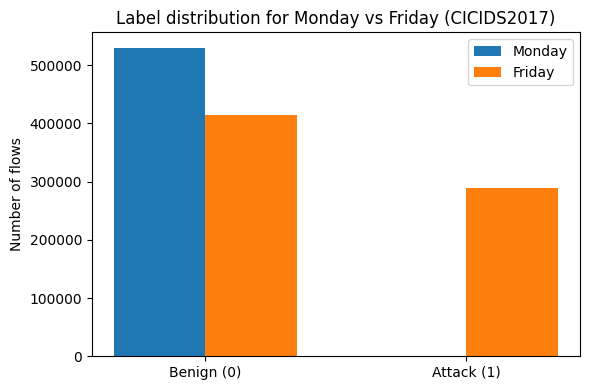

In [23]:
import matplotlib.pyplot as plt

# Count labels
mon_counts = y_mon.value_counts().sort_index()
fri_counts = y_fri.value_counts().sort_index()

labels = ["Benign (0)", "Attack (1)"]
mon_vals = [mon_counts.get(0, 0), mon_counts.get(1, 0)]
fri_vals = [fri_counts.get(0, 0), fri_counts.get(1, 0)]

x = range(len(labels))

plt.figure(figsize=(6, 4))
width = 0.35

plt.bar([i - width/2 for i in x], mon_vals, width, label="Monday")
plt.bar([i + width/2 for i in x], fri_vals, width, label="Friday")

plt.xticks(x, labels)
plt.ylabel("Number of flows")
plt.title("Label distribution for Monday vs Friday (CICIDS2017)")
plt.legend()
plt.tight_layout()

plt.savefig(FIG_DIR + "/fig_label_distribution_mon_fri.png", dpi=300)
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25500\396696930.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


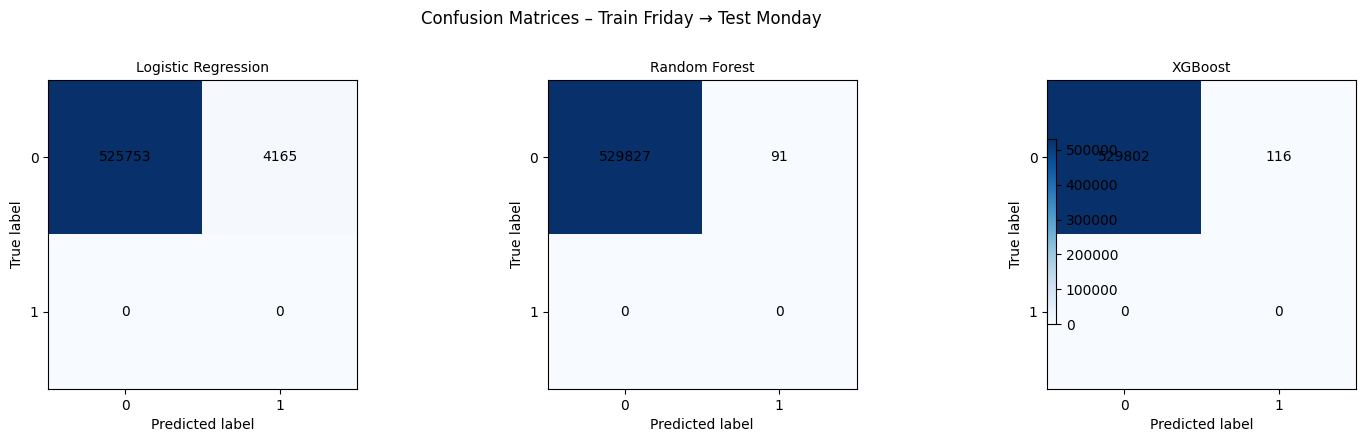

In [24]:
import matplotlib.pyplot as plt
import numpy as np

model_names = list(results.keys())
cms = [results[m]["cm"] for m in model_names]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, cm, name in zip(axes, cms, model_names):
    im = ax.imshow(cm, cmap="Blues")

    ax.set_title(name, fontsize=10)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
plt.suptitle("Confusion Matrices – Train Friday → Test Monday", y=1.05)
plt.tight_layout()

plt.savefig(FIG_DIR + "/fig_confusion_matrices_fri_to_mon.png", dpi=300, bbox_inches="tight")
plt.show()


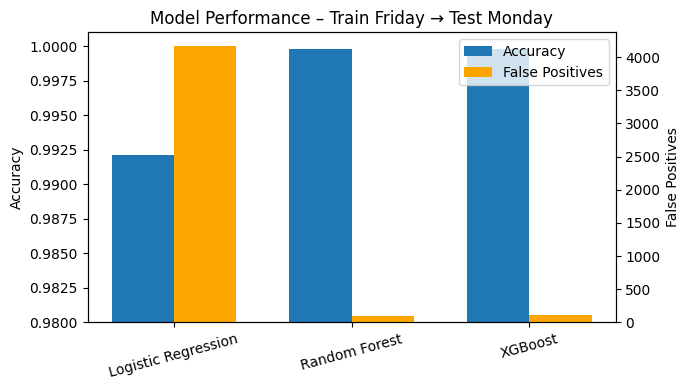

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

names = list(results.keys())
accuracies = [results[m]["accuracy"] for m in names]
fps = [results[m]["fp"] for m in names]

x = np.arange(len(names))
width = 0.35

fig, ax1 = plt.subplots(figsize=(7, 4))

# --- Accuracy Bar (Left Axis) ---
ax1.bar(x - width/2, accuracies, width, label="Accuracy")
ax1.set_ylabel("Accuracy")
ax1.set_ylim(0.98, 1.001)

# --- False Positives Bar (Right Axis) ---
ax2 = ax1.twinx()
ax2.bar(x + width/2, fps, width, color="orange", label="False Positives")
ax2.set_ylabel("False Positives")

ax1.set_xticks(x)
ax1.set_xticklabels(names, rotation=15)
ax1.set_title("Model Performance – Train Friday → Test Monday")

# legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc="upper right")

plt.tight_layout()
plt.savefig(FIG_DIR + "/fig_accuracy_fp_fri_to_mon.png", dpi=300)
plt.show()
